# Explanatory Data Analysis

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   

In [3]:
monday = pd.read_csv("./data/monday.csv", sep=';', index_col=0, parse_dates=True)

In [4]:
monday[monday['customer_no'] == 1]

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:05:00,1,checkout


In [5]:
# duplicates
duplicates = monday[monday.duplicated()]
no_duplicates = monday[monday.duplicated() == False]

print(duplicates[duplicates['location'] == 'checkout'])
print(duplicates[duplicates['location'] == 'spices'])

Empty DataFrame
Columns: [customer_no, location]
Index: []
                     customer_no location
timestamp                                
2019-09-02 07:09:00            7   spices
2019-09-02 07:17:00            6   spices
2019-09-02 07:18:00           25   spices
2019-09-02 07:25:00            6   spices
2019-09-02 07:25:00           34   spices
...                          ...      ...
2019-09-02 20:46:00         1340   spices
2019-09-02 20:49:00         1361   spices
2019-09-02 20:52:00         1371   spices
2019-09-02 20:59:00         1382   spices
2019-09-02 21:08:00         1351   spices

[166 rows x 2 columns]


* Calculate the total number of customers in each section   - *Wail*
* Calculate the total number of customers in each section over time     - *Nora*
* Display the number of customers at checkout over time     - *Nora*
* Calculate the time each customer spent in the market      - *Daniel*
* Calculate the total number of customers in the supermarket over time.     - *Daniel, Matthias*
* Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).      - *Matthias*

In [6]:
# Calculate the total number of customers in each section - Wail
no_duplicates.groupby(['location']).count()

,customer_no
location,
checkout,1437
dairy,720
drinks,661
fruit,827
spices,584


<AxesSubplot:xlabel='timestamp'>

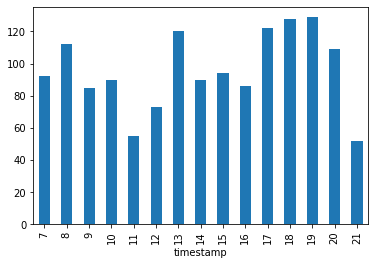

In [7]:
# Display the number of customers at checkout over time - Nora
time_step = monday.index.hour
filter = monday['location'] == 'checkout'
filtered_timestep = time_step[filter]
monday[filter].groupby(filtered_timestep)['customer_no'].count().plot(kind='bar')

In [8]:
# Calculate the time each customer spent in the market - Daniel
def time_spent(series):
    time_diff = series.index.max() - series.index.min()
    return time_diff.seconds / 60 

monday.groupby('customer_no').agg(time_spent).mean()

location    6.43953
dtype: float64

In [9]:
# Calculate the total number of customers in the supermarket over time. - Matthias

# Reduce to only one section per customer
customer_only = monday[monday['customer_no'].duplicated() == False]

time_step = customer_only.index.hour
customer_only.groupby([time_step])[['customer_no']].count()

,customer_no
timestamp,
7,102
8,113
9,88
10,80
11,56
12,79
13,119
14,86
15,94


In [10]:
# Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”). - Matthias

# not finished

monday_sorted = monday.sort_values(['customer_no', 'timestamp'])